# Exploring Univariate Distributions
In this tutorial, we demonstrate some of the different univariate distributions supported by the **Copulas** library. For typical applications, you will not need to manually specify the univariate distributions as it will be automatically selected.

In [1]:
%matplotlib inline
import warnings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
N = 10000
warnings.filterwarnings("ignore")

Let's import one of the built-in datasets from `copulas.datasets`. We'll plot a histogram of this dataset and observe that it has two modes at 0.0 and 10.0.

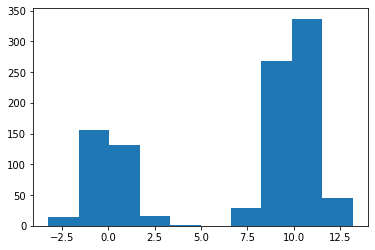

In [2]:
from copulas.datasets import sample_univariate_bimodal

data = sample_univariate_bimodal()
plt.hist(data);

Next, we can import some univariate distributions from **Copulas**. Each univariate model follows the same `fit`/`sample` API.

In [3]:
from copulas.univariate import GaussianUnivariate, GaussianKDE, BetaUnivariate

def fit_and_sample(model):
    model.fit(data)
    return model.sample(N)

fit_and_sample(GaussianUnivariate())

array([ 2.78150258,  7.57076375,  7.62637389, ...,  2.42584878,
       -2.3590153 ,  2.0450034 ])

Let's plot the synthetic data for each univariate distribution against the real data.

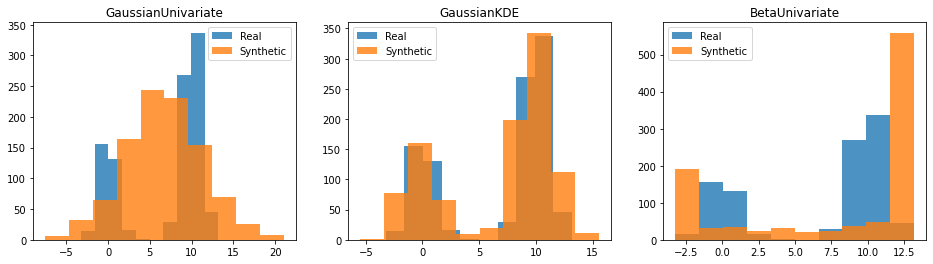

In [4]:
def plot_univariate_histograms(data, univariates):
    """
    Given an one-dimensional dataset and a list of univariate distributions, 
    this function models the dataset with each distribution and plots the
    real and synthetic histograms.
    """
    figure = plt.figure(figsize=(16,4))
    for idx, univariate in enumerate(univariates):
        univariate.fit(data)
        synthetic_data = univariate.sample(len(data))
        figure.add_subplot(1, len(univariates), idx+1)
        plt.hist(data, alpha=0.8, bins=10, label="Real")
        plt.hist(synthetic_data, alpha=0.8, bins=10, label="Synthetic")
        plt.title(type(univariate).__name__)
        plt.legend()

    return figure

plot_univariate_histograms(data, [GaussianUnivariate(), GaussianKDE(), BetaUnivariate()]);

Clearly, the `GaussianKDE` univariate distribution offers the best performance on this dataset since the real and synthetic dataset overlap significantly. The **Copulas** library provides a built-in function for automatically identifying the best univariate distribution for a given one-dimensional dataset. It takes in the data as well as a list of candidates and returns an (unfitted) instance of the best candidate distribution.

In [5]:
from copulas.univariate.selection import select_univariate

candidates = [GaussianKDE(), GaussianUnivariate(), BetaUnivariate()]

best_dist = select_univariate(data, candidates=candidates)
print("The best distribution for this dataset is: %s" % type(best_dist).__name__)

The best distribution for this dataset is: GaussianKDE


Here are a few more examples of datasets and the best-fitting univariate distribution for each.

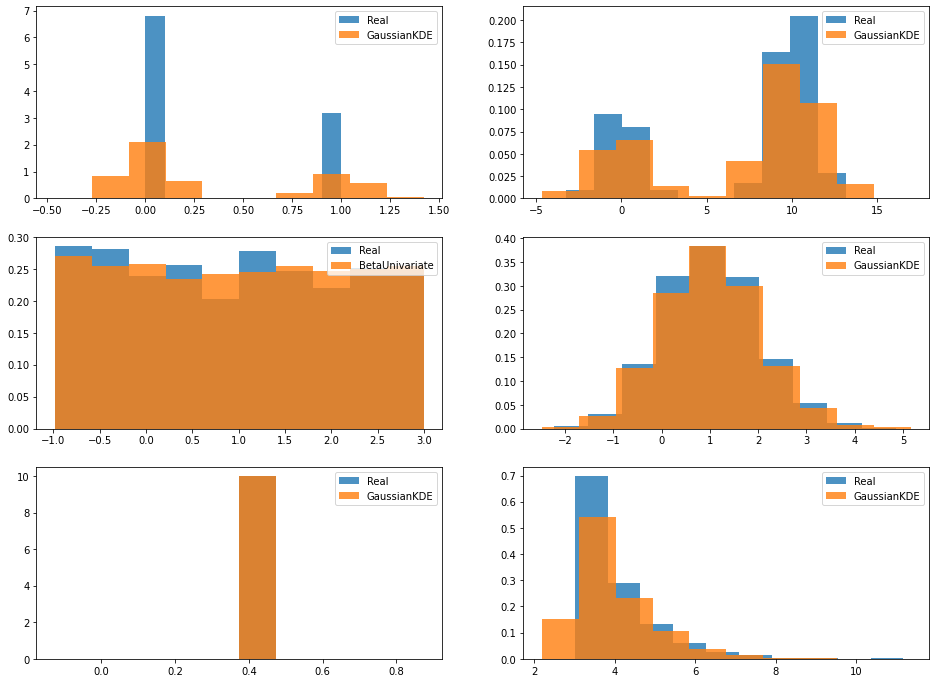

In [6]:
from copulas.datasets import sample_univariates

datasets = list(sample_univariates().iteritems())
nb_rows, nb_cols = len(datasets) // 2, 2

figure = plt.figure(figsize=(16,12))
for idx, (_, data) in enumerate(datasets):
    model = select_univariate(data, candidates=candidates)
    model.fit(data) # We need to actually *fit* the returned instance.
    figure.add_subplot(nb_rows, nb_cols, idx+1)
    plt.hist(data, alpha=0.8, density=True, label="Real")
    plt.hist(model.sample(N).flatten(), alpha=0.8, density=True, label=type(model).__name__)
    plt.legend()

plt.show();